# Logistic regression with Scikit-Learn

Pentru a înțelege cel mai bine cum funcționează partea de Logistic Regression o să începem să trecem și peste partea practică. O să începem prima dată cu explorarea unui set de date. Acest set de date a fost realizat în urma unui studiu pe 5000 de persoane cu privire la calitatea auzului. Ca și input avem vârsta persoanelor și o valoare pe 'physical health'. Persoanele au fost puse să asculte anumite note destul de mari, iar dacă le auzeau cu succes au primit valoarea 1 (de passed), respectiv 0 dacă nu le auzeau (failed). Să explorăm acest set de date în Python

In [4]:
# importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('../data/DATA/hearing_test.csv')

In [ ]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


Mai sus avem datele care alcătuiesc acest DataFrame. Avem o coloană de age unde este trecută vârsta persoanei respective și o coloană de physical_score care reprezintă starea fizică de sănătate a acelei persoane. Ca și label avem coloana de test_result unde sunt valori de 1 și 0. 1 înseamnă că persoana respectivă a auzit sunetul respectiv, a trecut testul, iar 0 înseamnă că persoana respecitvă nu a trecut testul deoarece nu a auzit acel sunet.

In [ ]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


Putyem să apelăm și metoda describe pentru acest DataFrame unde putem afla informații utile despre coloanele age și physical_result. Aici putem să vedem valoarea medie, mediana acestui DataFrame precum și valorile de 25 și 75%

In [9]:
df['test_result'].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='test_result', ylabel='count'>

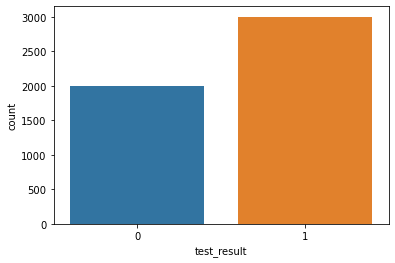

In [10]:
sns.countplot(df['test_result'])

Ca să vedem câte persoane fac parte din fiecare categorie putem să utilizîm metoda value_counts() pentru întregul DataFrame, iar dacă dorim să avem o reprezentare grafică a acestor valori putem să utilizăm un countplot() din seaborn

<AxesSubplot:xlabel='test_result', ylabel='age'>

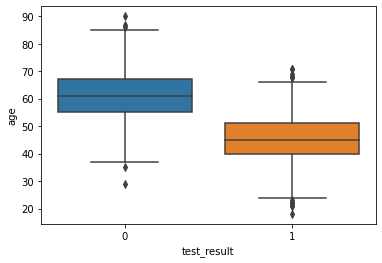

In [11]:
sns.boxplot(x='test_result', y='age', data=df)

În continuare putem să analizăm corelația dintre datele respective. Se poate observa din graficul de mai sus faptul că atunci când avem o vârstă mai mare (media pe la 60 de ani) este o probabilitate foarte mare ca persoana respectivă să nu fi trecut testul, respectiv invers. Acest lucru este perfect normal deoarece odată cu creșterea în vârstă calitatea auzului unei persoane se pierde.

<AxesSubplot:xlabel='test_result', ylabel='physical_score'>

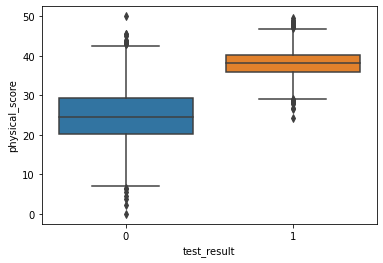

In [14]:
sns.boxplot(x='test_result', y='physical_score', data=df)

În ceea ce privește corelația dintre rezultatul fizic și rezultatul testului, aici se poate observa și mai bine faptul că persoanele care au un rezultat mai bun la testul fizic (adică o valoare mai mare) au tendința să treacă testul final, cel de auz

<AxesSubplot:xlabel='age', ylabel='physical_score'>

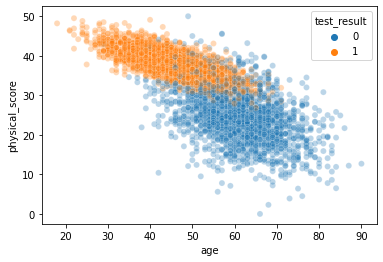

In [17]:
sns.scatterplot(x='age', y='physical_score', data=df, hue='test_result', alpha=0.3)

Umrătoarea corelație la care putem să ne uităm este cea dintre vârstă și testu fizic. Din acest grafic se poate observa faptul că atunci când o persoană are o vârstă mai mare, rezultatul la testul fizic este mai slab. Se poate observa o relație liniară pentru aceste două features. Dacă împărțim datele din acest plot în funcție de rezultatul de la testul final, se poate observa faptul că persoanele mai tinere care au obținut un rezultat bun la testul fizic erau cel mai probabil să treacă testul final de auz.

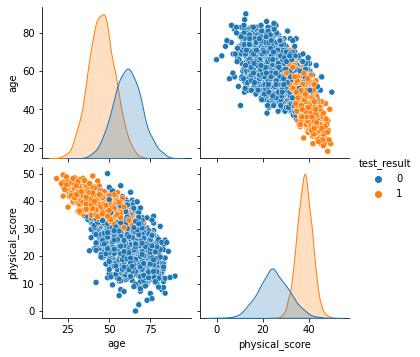

In [18]:
sns.pairplot(df, hue='test_result')

<AxesSubplot:>

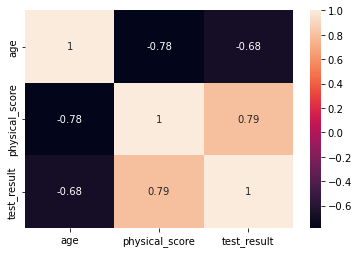

In [19]:
sns.heatmap(df.corr(), annot=True)

La final am mai creat două ploturi care ne spun tot aceleași lucruri ca și mai sus, faptul că există o corelație între vârstă, testul fizic și testul final prin care au trecut participanții la studiu.

Acum după ce am aruncat o privire peste datele din acest DataFrame putem să trecem la parte în care utilizăm Scikit-Learn pentru a crea și antrena un model de Logistic Regression